# What's Cooking? Support Vector Machine Power Normalization
In this assignment you will have to complete the analysis on the data for this competition.

Specifically you will have to do the following operations and visualizations:

- Apply a function that does the following pre-processing:
    - Lowercases the ingredients, removes punctuation and Engligh stopwords.
- Plot the top 20 most frequent words.
- Group by cuisine and plot the 20 most frequent words.
- Get in a list the vocabulary (unigrams) of each cuisine (this will be a dataframe with two columns, the cuisine and the list of unique tokens).
- Measure the overlap of each pair of cuisines in terms of Dice coefficient. Then do an appropriate plot.

In [9]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import nltk

In [10]:
# load the data
train_dataset = pd.read_json("train.json")

test_dataset = pd.read_json("test.json")

In [11]:
train_dataset

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


In [12]:
test_dataset

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."
...,...,...
9939,30246,"[large egg yolks, fresh lemon juice, sugar, bo..."
9940,36028,"[hot sauce, butter, sweet potatoes, adobo sauc..."
9941,22339,"[black pepper, salt, parmigiano reggiano chees..."
9942,42525,"[cheddar cheese, cayenne, paprika, plum tomato..."


In [13]:
cuisines = train_dataset["cuisine"].unique()
print(cuisines)
print(cuisines.shape)

['greek' 'southern_us' 'filipino' 'indian' 'jamaican' 'spanish' 'italian'
 'mexican' 'chinese' 'british' 'thai' 'vietnamese' 'cajun_creole'
 'brazilian' 'french' 'japanese' 'irish' 'korean' 'moroccan' 'russian']
(20,)


In [14]:
# check for null values
train_dataset.isnull().any()

id             False
cuisine        False
ingredients    False
dtype: bool

In [15]:
train_dataset.isnull().sum() # no null values!

id             0
cuisine        0
ingredients    0
dtype: int64

In [ ]:
test_dataset.isnull().any()

In [ ]:
test_dataset.isnull().sum() # no null values!

In [52]:
# Define some utility function here
import re

def preprocess_original(text):
    t = re.sub("\W", r" ", text)
    t = re.sub("\d", r" ", t)
    return t

In [17]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [18]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
train_dataset["ingredients"].dtype

dtype('O')

In [20]:
# define the function for pre-processing
def preprocess(ingredients):
    """
    Lowercases the ingredients, removes punctuation and English stopwords.

    Args:
        ingredients (str): A string of ingredients.

    Returns:
        A list of pre-processed ingredients.
    """
    # Convert to lowercase
    ingredients = [x.lower() for x in ingredients]
    
    # Remove punctuation and special characters
    ingredients = [re.sub(r'[^\w\s]', '', x) for x in ingredients]

    # Remove English stopwords
    stop_words = set(stopwords.words('english'))
    ingredients = [' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]) for x in ingredients]

    return ingredients

In [21]:
train_dataset["ingredients"] = train_dataset["ingredients"].apply(preprocess)

In [22]:
train_dataset["ingredients"]

0        [romaine lettuce, black olives, grape tomatoes...
1        [plain flour, ground pepper, salt, tomatoes, g...
2        [eggs, pepper, salt, mayonaise, cooking oil, g...
3                      [water, vegetable oil, wheat, salt]
4        [black pepper, shallots, cornflour, cayenne pe...
                               ...                        
39769    [light brown sugar, granulated sugar, butter, ...
39770    [kraft zesty italian dressing, purple onion, b...
39771    [eggs, citrus fruit, raisins, sourdough starte...
39772    [boneless chicken skinless thigh, minced garli...
39773    [green chile, jalapeno chilies, onions, ground...
Name: ingredients, Length: 39774, dtype: object

In [23]:
test_dataset["ingredients"] = test_dataset["ingredients"].apply(preprocess)

In [24]:
test_dataset["ingredients"]

0       [baking powder, eggs, allpurpose flour, raisin...
1       [sugar, egg yolks, corn starch, cream tartar, ...
2       [sausage links, fennel bulb, fronds, olive oil...
3       [meat cuts, file powder, smoked sausage, okra,...
4       [ground black pepper, salt, sausage casings, l...
                              ...                        
9939    [large egg yolks, fresh lemon juice, sugar, bo...
9940    [hot sauce, butter, sweet potatoes, adobo sauc...
9941    [black pepper, salt, parmigiano reggiano chees...
9942    [cheddar cheese, cayenne, paprika, plum tomato...
9943    [cold water, olive oil, lime wedges, garlic cl...
Name: ingredients, Length: 9944, dtype: object

## Data Visualization 

In [25]:
import matplotlib.pyplot as plt

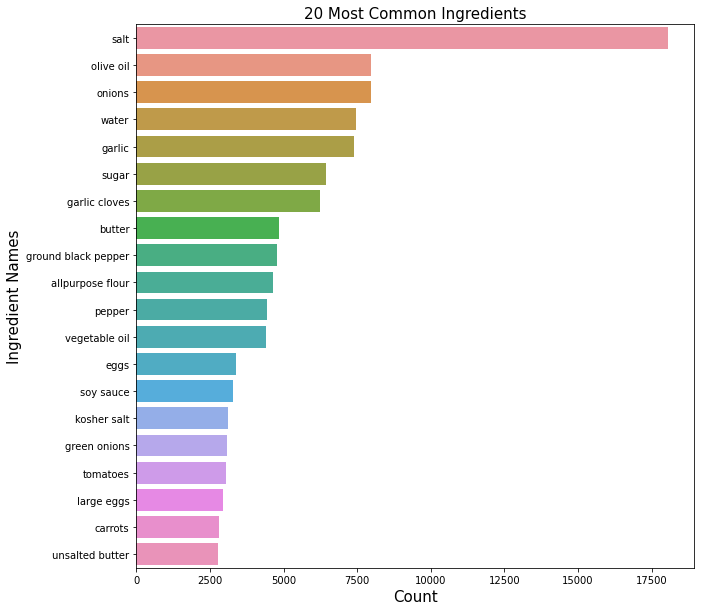

In [26]:
#Finding count of 20 most common ingredients in our train dataset
ingredient_counts = []
for x in train_dataset['ingredients']:
    for y in x:
        ingredient_counts.append(y)
ingredient_counts = pd.Series(ingredient_counts)
counted_ingredients = ingredient_counts.value_counts(sort=True).head(20)
plt.figure(figsize=(10,10))
sns.barplot(y = counted_ingredients.index, x = counted_ingredients.values)
plt.title('20 Most Common Ingredients', fontsize=15)
plt.ylabel('Ingredient Names', fontsize=15)
plt.xlabel('Count', fontsize=15)
plt.show()

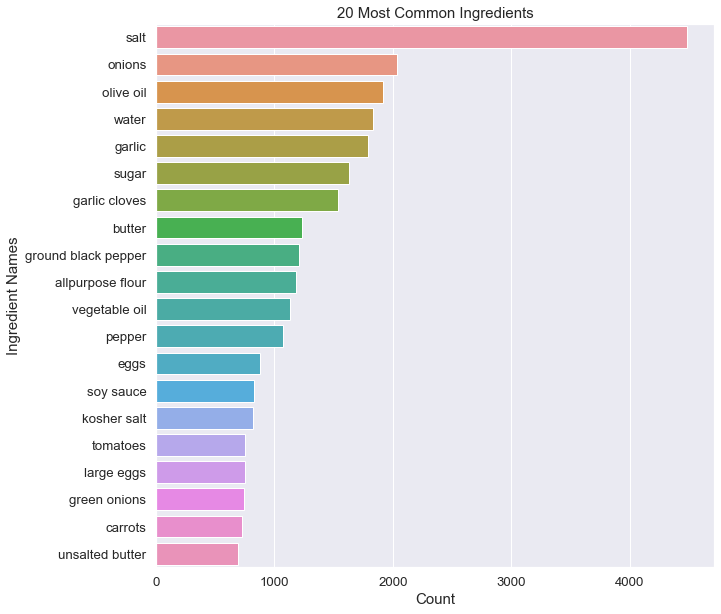

In [39]:
#Finding count of 20 most common ingredients in our test dataset
ingredient_counts = []
for x in test_dataset['ingredients']:
    for y in x:
        ingredient_counts.append(y)
ingredient_counts = pd.Series(ingredient_counts)
counted_ingredients = ingredient_counts.value_counts(sort=True).head(20)
plt.figure(figsize=(10,10))
sns.barplot(y = counted_ingredients.index, x = counted_ingredients.values)
plt.title('20 Most Common Ingredients', fontsize=15)
plt.ylabel('Ingredient Names', fontsize=15)
plt.xlabel('Count', fontsize=15)
plt.show()

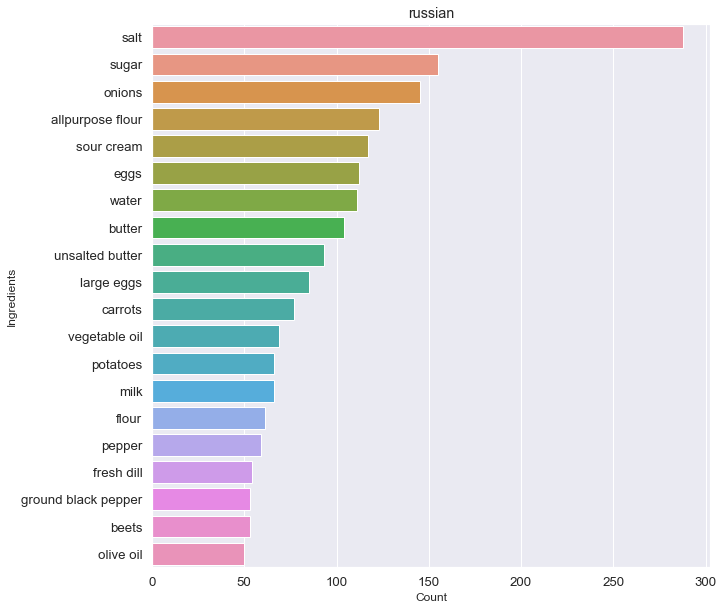

In [34]:
#Top 20 ingredients in all cuisines in train dataset
cuisines = train_dataset['cuisine'].unique()
for i in cuisines:
    ingredients=[]
    for j in train_dataset[train_dataset['cuisine']==i]['ingredients']:
        for k in j:
            ingredients.append(k)
ingredients = pd.Series(ingredients)
counted_ingredients = ingredients.value_counts(sort=True).head(20)
plt.figure(figsize=(10,10))
sns.barplot(y = counted_ingredients.index, x = counted_ingredients.values)
plt.title(i)
plt.ylabel('Ingredients', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.show()

In [42]:
counted_ings_train = train_dataset.explode(column = "ingredients").value_counts(subset=["ingredients"])
counted_ings_train

ingredients                                        
salt                                                   18049
onions                                                  7972
olive oil                                               7972
water                                                   7457
garlic                                                  7380
                                                       ...  
satsuma juice                                              1
hoja santa                                                 1
sato imo                                                   1
sargento traditional cut shredded mozzarella cheese        1
kosher wine                                                1
Length: 6691, dtype: int64

In [43]:
counted_ings_test = test_dataset.explode(column = "ingredients").value_counts(subset=["ingredients"])
counted_ings_test

ingredients                 
salt                            4485
onions                          2036
olive oil                       1917
water                           1836
garlic                          1791
                                ... 
reduced sodium tomato juice        1
gala apples                        1
galanga                            1
reduced sodium chicken stock       1
                                   1
Length: 4474, dtype: int64

<Axes: xlabel='ingredients'>

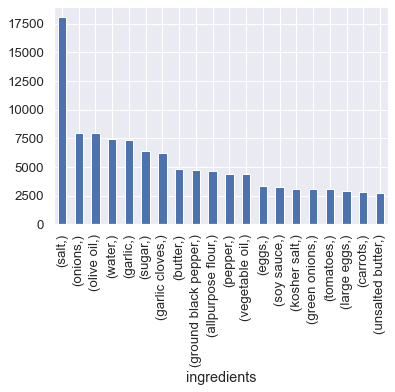

In [44]:
# count plots for train dataset ingredient numbers
counted_ings_train = counted_ings[:20]
counted_ings_train.plot(kind = "bar")

<Axes: ylabel='ingredients'>

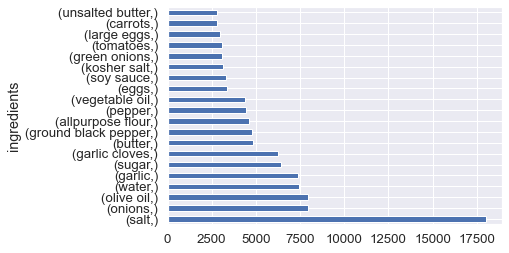

In [48]:
# count plots for train dataset ingredient numbers
counted_ings_train.plot.barh()

<Axes: xlabel='ingredients'>

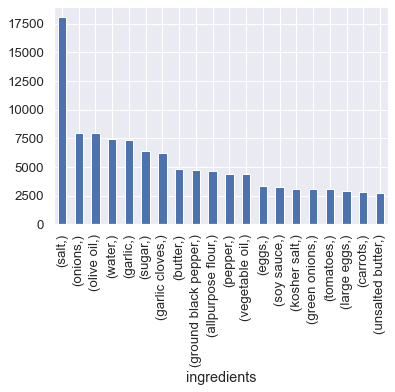

In [45]:
# count plots for test dataset ingredient numbers
counted_ings_test = counted_ings[:20]
counted_ings_test.plot(kind = "bar")

<Axes: ylabel='ingredients'>

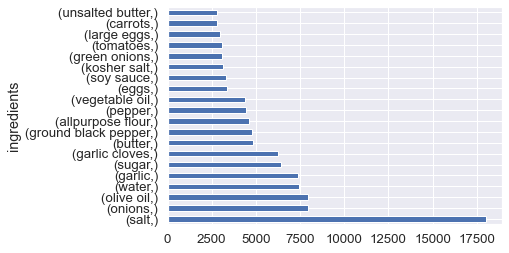

In [47]:
counted_ings_test.plot.barh()

In [31]:
# Get in a list the vocabulary of each cuisine 
#(this will be a dataframe with two columns, the cuisine and the list of unique tokens).
train_dataset.explode('ingredients').groupby('cuisine')['ingredients'].apply(set)

cuisine
brazilian       {, sliced tomatoes, sambal ulek, ear corn, fla...
british         {prepared horseradish, lamb kidneys, turkish b...
cajun_creole    {polish sausage, flank steak, champagne, angel...
chinese         {pineapple rings, persian cucumber, sambal ule...
filipino        {polish sausage, pineapple slices, sambal ulek...
french          {flank steak, champagne, angel hair, chunk lig...
greek           {persian cucumber, prepared horseradish, kasse...
indian          {persian cucumber, winter squash, flank steak,...
irish           {persian cucumber, prepared horseradish, slice...
italian         {winter squash, sambal ulek, flank steak, cham...
jamaican        {, pineapple slices, winter squash, turnips, p...
japanese        {persian cucumber, sambal ulek, flank steak, a...
korean          {tatsoi, persian cucumber, sambal ulek, flank ...
mexican         {pineapple rings, , shelled hemp seeds, dr pep...
moroccan        {lentilles du puy, sambal ulek, chervil, turni...
ru

In [37]:
# Define function to measure the overlap of each pair of cuisines using the Dice Coefficient
from nltk import ngrams
from pandas import DataFrame

def dice_coefficient(a, b):
    """Compute the Dice coefficient between two sets a and b."""
    intersection = len(a & b)
    return 2 * intersection / (len(a) + len(b))

def dice_matrix(data, column):
    """Compute the pairwise Dice coefficient matrix for the given column in the given dataframe."""
    cuisines = data['cuisine'].unique()
    n = len(cuisines)
    matrix = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(i+1, n):
            cuisine1 = cuisines[i]
            cuisine2 = cuisines[j]
            ingredients1 = set(data[data['cuisine']==cuisine1][column].explode())
            ingredients2 = set(data[data['cuisine']==cuisine2][column].explode())
            dice = dice_coefficient(ingredients1, ingredients2)
            matrix[i][j] = dice
            matrix[j][i] = dice
    return DataFrame(matrix, columns=cuisines, index=cuisines)

# Example usage
dice_df = dice_matrix(train_dataset, 'ingredients')
print(dice_df)

                 greek  southern_us  filipino    indian  jamaican   spanish  \
greek         0.000000     0.458003  0.388993  0.502098  0.439518  0.543089   
southern_us   0.458003     0.000000  0.377314  0.487983  0.410318  0.490454   
filipino      0.388993     0.377314  0.000000  0.437117  0.480527  0.420290   
indian        0.502098     0.487983  0.437117  0.000000  0.472627  0.484268   
jamaican      0.439518     0.410318  0.480527  0.472627  0.000000  0.485273   
spanish       0.543089     0.490454  0.420290  0.484268  0.485273  0.000000   
italian       0.480368     0.576416  0.328343  0.461438  0.347963  0.496420   
mexican       0.455742     0.592910  0.365995  0.486748  0.398424  0.484895   
chinese       0.419009     0.469037  0.478070  0.509270  0.422197  0.431848   
british       0.440965     0.452236  0.379915  0.439335  0.433888  0.470540   
thai          0.445998     0.426298  0.497847  0.554970  0.450954  0.445792   
vietnamese    0.396357     0.370827  0.518014  0.469

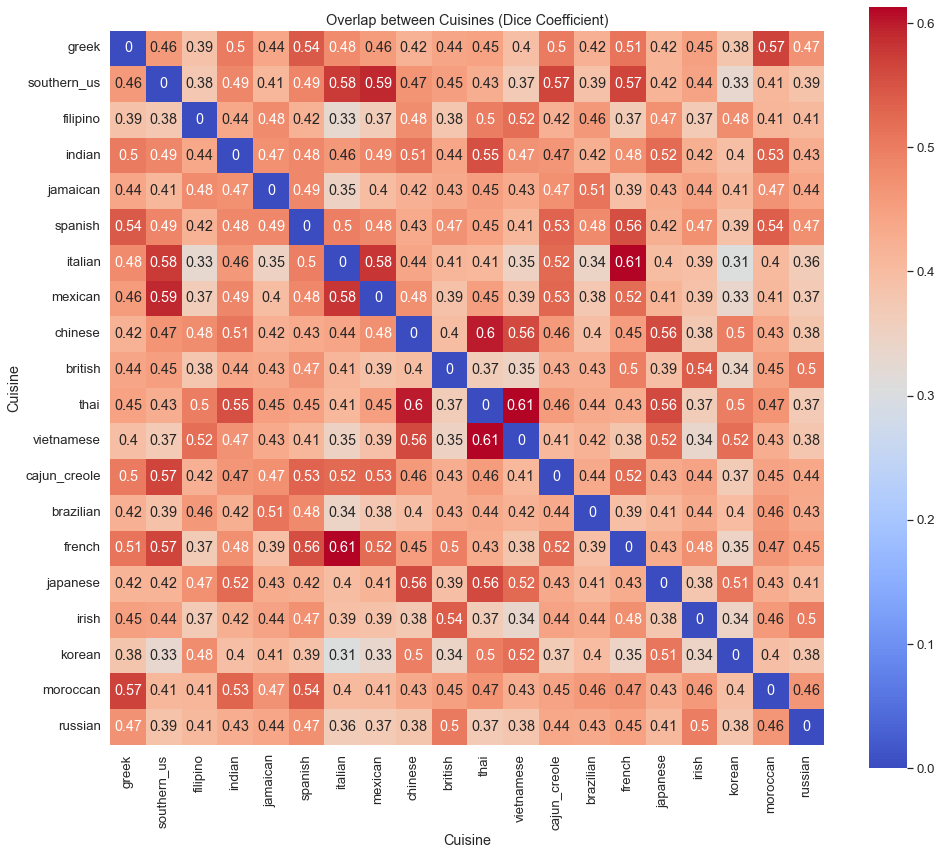

In [38]:
# Plot dice coefficients using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the overlap matrix
overlap_matrix = dice_matrix(train_dataset, 'ingredients')

# Plot the heatmap
sns.set(font_scale=1.2)
plt.figure(figsize=(16, 14))
sns.heatmap(overlap_matrix, annot=True, cmap='coolwarm', square=True, 
            xticklabels=overlap_matrix.columns, yticklabels=overlap_matrix.columns)
plt.title('Overlap between Cuisines (Dice Coefficient)')
plt.xlabel('Cuisine')
plt.ylabel('Cuisine')
plt.show()

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import Normalizer,LabelEncoder,normalize,PolynomialFeatures

# We will use a lemmatizer to get the lemma of the word
lemmatizer = WordNetLemmatizer()

# Let's pre-preocess the ingredients
train_dataset['preprocessed_ingr'] = [' '.join([lemmatizer.lemmatize(preprocess_original(ingr)) for ingr in recipe])
                                      .strip() 
                                      for recipe in train_dataset['ingredients']]

tfidf = TfidfVectorizer(sublinear_tf=True,max_df=0.5,ngram_range=(1,2)
                        ,stop_words='english',norm='l2',binary=False)
# fit the vectorizer
tfidf.fit(train_dataset['preprocessed_ingr'])
# transform the dataset
X_train = tfidf.transform(train_dataset['preprocessed_ingr'])
# take the labels
y_train = train_dataset['cuisine']

In [56]:
assert X_train.shape[0] == y_train.shape[0], "Wrong shapes"

In [57]:
# This is a sparse array
type(X_train)

scipy.sparse.csr.csr_matrix

In [59]:
#power normalization
X_train.data**=0.5
normalize(X_train,copy=False)

<39774x81551 sparse matrix of type '<class 'numpy.float64'>'
	with 1460236 stored elements in Compressed Sparse Row format>

Note that here we user power scaling which reduces further the effect of frequent terms. After the scaling we re-normalize the data. We use the square root as default value, but one should optimize this value through random search.

In the following we apply the same transformation on the test data.

In [61]:
test_dataset['preprocessed_ingr'] = [' '.join([lemmatizer.lemmatize(preprocess_original(ingr)) for ingr in recipe])
                                     .strip() for recipe in test_dataset['ingredients']]
X_test = tfidf.transform(test_dataset['preprocessed_ingr'])

Now we are ready to fit a model and do prediction on the test set. Then we will be able to measure the performance on the test set. We will use a linear Support Vector Machine.

In [62]:
from sklearn.model_selection import cross_validate
from sklearn.svm import LinearSVC

svm_clf = LinearSVC(C=0.5,multi_class='ovr',dual=True)
scores_svm = cross_validate(svm_clf,X_train,y_train,scoring="accuracy")
print(scores_svm)
print("Average accuracy: {}".format(np.mean(scores_svm["test_score"])))

{'fit_time': array([1.38642502, 1.07470489, 1.07738113, 1.18802285, 1.143538  ]), 'score_time': array([0.01602793, 0.01343107, 0.01335597, 0.01432014, 0.01536489]), 'test_score': array([0.7910748 , 0.79157762, 0.79132621, 0.78717788, 0.79808901])}
Average accuracy: 0.791849103432101


In [63]:
# Fit the model on the full dataset
svm_clf.fit(X_train,y_train)
predicted_labels = svm_clf.predict(X_test)

In [64]:
test_dataset["cuisine"] = predicted_labels

In [65]:
test_dataset

,id,ingredients,preprocessed_ingr,cuisine
0,18009,"[baking powder, eggs, allpurpose flour, raisin...",baking powder egg allpurpose flour raisin milk...,irish
1,28583,"[sugar, egg yolks, corn starch, cream tartar, ...",sugar egg yolks corn starch cream tartar banan...,southern_us
2,41580,"[sausage links, fennel bulb, fronds, olive oil...",sausage links fennel bulb frond olive oil cuba...,italian
3,29752,"[meat cuts, file powder, smoked sausage, okra,...",meat cuts file powder smoked sausage okra shri...,cajun_creole
4,35687,"[ground black pepper, salt, sausage casings, l...",ground black pepper salt sausage casings leek ...,italian
...,...,...,...,...
9939,30246,"[large egg yolks, fresh lemon juice, sugar, bo...",large egg yolks fresh lemon juice sugar bourbo...,french
9940,36028,"[hot sauce, butter, sweet potatoes, adobo sauc...",hot sauce butter sweet potatoes adobo sauce salt,southern_us
9941,22339,"[black pepper, salt, parmigiano reggiano chees...",black pepper salt parmigiano reggiano cheese r...,italian
9942,42525,"[cheddar cheese, cayenne, paprika, plum tomato...",cheddar cheese cayenne paprika plum tomatoes g...,southern_us


Save the predictions and submit to Kaggle

In [66]:
test_dataset[['id','cuisine']].to_csv("svm_power_norm.csv",index=False)